<a href="https://colab.research.google.com/github/Kaiyang-Liu/business_analytics/blob/master/Analysis_cov19_in_US.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a pratice of data analysis, see original from github: https://github.com/paiml/minimal-python/blob/master/Chapter7_data_science.ipynb

# **1. Ingestion**

Data source: https://github.com/nytimes/covid-19-data

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [ ]:
df.tail()

,date,state,fips,cases,deaths
9359,2020-08-19,Virginia,51,109019,2410
9360,2020-08-19,Washington,53,71595,1911
9361,2020-08-19,West Virginia,54,8801,166
9362,2020-08-19,Wisconsin,55,72204,1071
9363,2020-08-19,Wyoming,56,3430,34


In [ ]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [ ]:
df.shape

(9364, 5)

# **2. EDA**

In [ ]:
df.describe()

,fips,cases,deaths
count,9364.000000,9364.000000,9364.000000
mean,31.799551,36302.129218,1561.664994
std,18.580585,75479.179501,3979.847265
min,1.000000,1.000000,0.000000
25%,17.000000,989.000000,17.000000
50%,31.000000,8331.000000,247.000000
75%,46.000000,38210.750000,1267.250000
max,78.000000,646742.000000,32451.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


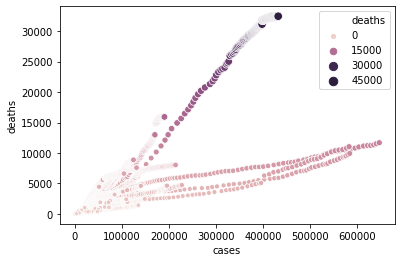

In [ ]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=df)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2020-08-19', '2020-08-19', '2020-08-19', '2020-08-19',
               '2020-08-19', '2020-08-19', '2020-08-19', '2020-08-19',
               '2020-08-19', '2020-08-19'],
              dtype='datetime64[ns]', name='date', length=9364, freq=None)

In [ ]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days = 2)
print(f"Today {today}")
print(f"Two days ago {daybefore}")

Today 2020-08-20
Two days ago 2020-08-18


In [ ]:
df.loc[daybefore:today].head()

,state,fips,cases,deaths
date,,,,
2020-08-18,Alabama,1,110361,1936
2020-08-18,Alaska,2,5175,27
2020-08-18,Arizona,4,194931,4535
2020-08-18,Arkansas,5,53487,619
2020-08-18,California,6,640499,11523


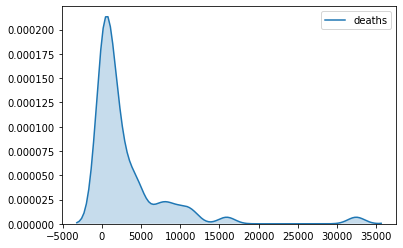

In [ ]:
sns.kdeplot(df.loc[daybefore:today]["deaths"], shade=True)

In [ ]:
current_df = df.loc[daybefore:today].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2020-08-19,New York,36,431924,32451
2020-08-18,New York,36,431298,32446
2020-08-19,New Jersey,34,190256,15926
2020-08-18,New Jersey,34,189937,15925
2020-08-19,California,6,646742,11686
2020-08-18,California,6,640499,11523
2020-08-19,Texas,48,582623,11043
2020-08-18,Texas,48,577220,10798
2020-08-19,Florida,12,584039,9931


In [ ]:
current_df.shape

(110, 4)

In [ ]:
top_ten_states = list(current_df["state"].head(10).values)
top_ten_states

['New York',
 'New York',
 'New Jersey',
 'New Jersey',
 'California',
 'California',
 'Texas',
 'Texas',
 'Florida',
 'Florida']

In [ ]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")

In [ ]:
set(top_states_df.state.values)

{'California', 'Florida', 'New Jersey', 'New York', 'Texas'}

<Figure size 1080x360 with 0 Axes>

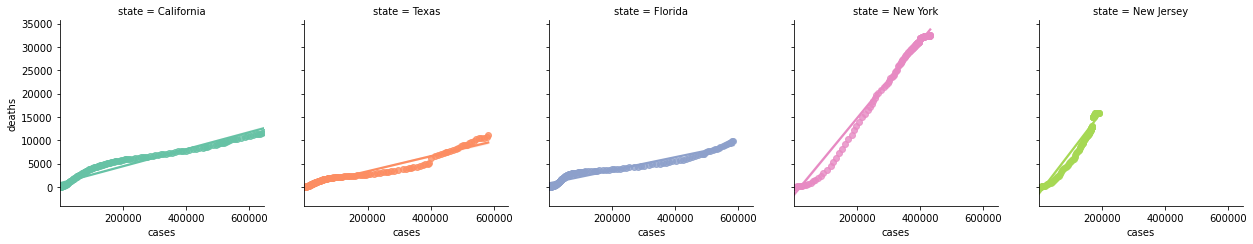

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state", 
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

In [ ]:
top_states_march_current_df = top_states_df.loc["2020-03-08":today].sort_values(by=["deaths", "cases"], ascending=True)
top_states_march_current_df.head()

,state,cases,deaths
date,,,
2020-03-08,New Jersey,6,0
2020-03-09,New Jersey,11,0
2020-03-08,Texas,23,0
2020-03-09,Texas,24,0
2020-03-10,Texas,31,0


In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(top_states_march_current_df, x=top_states_march_current_df.index, y="cases", size="deaths", color="state", facet_col="state")
fig.show()

In [ ]:
cdc_2013 = pd.read_csv("https://raw.githubusercontent.com/noahgift/sugar/master/data/education_sugar_cdc_2003.csv")
cdc_2013.set_index("State", inplace=True)
for column in cdc_2013.columns:
  cdc_2013[column]=cdc_2013[column].str.replace(r"\(.*\)","")
  cdc_2013[column]=pd.to_numeric(cdc_2013[column])
  
cdc_2013.reset_index(inplace=True)
cdc_2013.rename(columns={"State": "state", "Employed": "employed-sugar-intake-daily"},inplace=True)
cdc_2013.head()

,state,employed-sugar-intake-daily,Not employed,Retired,<High school,High school,Some college,College graduate
0,Alaska,26.2,32.1,16.0,47.1,34.9,24.2,12.9
1,Arizona,33.0,28.7,13.8,40.4,36.5,24.4,14.6
2,California,22.9,30.2,15.0,38.5,29.9,21.4,11.5
3,Connecticut,18.9,24.3,15.0,27.8,26.9,19.9,10.2
4,District of Columbia,18.5,34.6,18.5,45.6,39.0,28.9,8.4


In [ ]:
cdc_employed_df = cdc_2013[["employed-sugar-intake-daily", "state"]]
sugar_covid_df = df.merge(cdc_employed_df, how="inner", on="state")
sugar_covid_df.head()

,state,fips,cases,deaths,employed-sugar-intake-daily
0,California,6,1,0,22.9
1,California,6,2,0,22.9
2,California,6,2,0,22.9
3,California,6,2,0,22.9
4,California,6,2,0,22.9


In [ ]:
election_df = pd.read_csv("https://raw.githubusercontent.com/paiml/minimal-python/master/data/2016-Electoral-Votes.csv")
election_df.rename(columns={"State": "state"},inplace=True)
election_df.drop(columns="Votes", inplace=True)
election_df = pd.concat([election_df, pd.get_dummies(election_df["Winning Party"])], axis=1);
election_df.head()
#election_df["Republican?"] = pd.get_dummies(election_df, columns=["Winning Party"])
#election_df.head()

,state,Winning Party,Democrats,Republicans
0,Alabama,Republicans,0,1
1,Alaska,Republicans,0,1
2,Arizona,Republicans,0,1
3,Arkansas,Republicans,0,1
4,California,Democrats,1,0


In [ ]:
sugar_covid_df = sugar_covid_df.merge(election_df, how="inner", on="state")
sugar_covid_df.head()

,state,fips,cases,deaths,employed-sugar-intake-daily,Winning Party,Democrats,Republicans
0,California,6,1,0,22.9,Democrats,1,0
1,California,6,2,0,22.9,Democrats,1,0
2,California,6,2,0,22.9,Democrats,1,0
3,California,6,2,0,22.9,Democrats,1,0
4,California,6,2,0,22.9,Democrats,1,0


In [ ]:
sugar_covid_df.corr()

,fips,cases,deaths,employed-sugar-intake-daily,Democrats,Republicans
fips,1.000000,-0.053970,0.027654,0.262969,-0.195483,0.195483
cases,-0.053970,1.000000,0.868073,-0.222570,0.352424,-0.352424
deaths,0.027654,0.868073,1.000000,-0.259499,0.388663,-0.388663
employed-sugar-intake-daily,0.262969,-0.222570,-0.259499,1.000000,-0.765933,0.765933
Democrats,-0.195483,0.352424,0.388663,-0.765933,1.000000,-1.000000
Republicans,0.195483,-0.352424,-0.388663,0.765933,-1.000000,1.000000


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z=sugar_covid_df.corr(),
                   x=['fips','cases', 'deaths', 'employed-sugar-intake-daily', 'Democrats', 'Republicans'],
                   y=['fips','cases', 'deaths', 'employed-sugar-intake-daily', 'Democrats', 'Republicans'],
                   hoverongaps = False))
fig.show()

In [ ]:
sugar_covid_df.to_csv("covid-eda.csv")

# **3. Modelling**

# **4. Conclusion**